In [57]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'X')

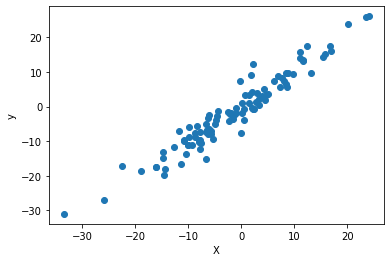

In [58]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('X')

In [59]:
class LR(nn.Module): 
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [60]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [61]:
[w, b] = model.parameters()
def get_params():
    return(w[0][0].item(), b[0].item())

In [62]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

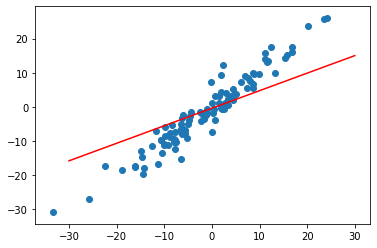

In [63]:
plot_fit('Initial Mode')

In [64]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) #Stochastic gradient descent = fast method of getting gradient

In [65]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 36.44832992553711
epoch: 1 loss: 25.84706687927246
epoch: 2 loss: 19.274919509887695
epoch: 3 loss: 15.200481414794922
epoch: 4 loss: 12.674422264099121
epoch: 5 loss: 11.10822868347168
epoch: 6 loss: 10.137072563171387
epoch: 7 loss: 9.534791946411133
epoch: 8 loss: 9.161184310913086
epoch: 9 loss: 8.92933464050293
epoch: 10 loss: 8.785365104675293
epoch: 11 loss: 8.69587516784668
epoch: 12 loss: 8.640158653259277
epoch: 13 loss: 8.605380058288574
epoch: 14 loss: 8.58358097076416
epoch: 15 loss: 8.569830894470215
epoch: 16 loss: 8.56106948852539
epoch: 17 loss: 8.555403709411621
epoch: 18 loss: 8.551656723022461
epoch: 19 loss: 8.549099922180176
epoch: 20 loss: 8.547282218933105
epoch: 21 loss: 8.545924186706543
epoch: 22 loss: 8.54485034942627
epoch: 23 loss: 8.543954849243164
epoch: 24 loss: 8.543170928955078
epoch: 25 loss: 8.54245662689209
epoch: 26 loss: 8.541786193847656
epoch: 27 loss: 8.541145324707031
epoch: 28 loss: 8.540521621704102
epoch: 29 loss: 8.53991031

Text(0.5, 0, 'Epoch')

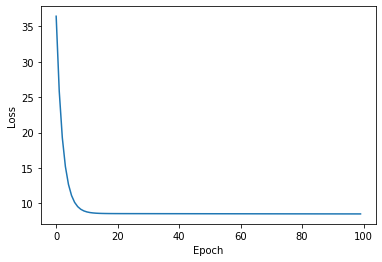

In [66]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

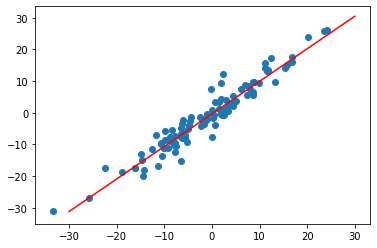

In [67]:
plot_fit('Trained Model')